Importing the Dataset to the Colab Notebook

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c dogs-vs-cats
!unzip test1
!unzip train

Dividing the images into train and validation sets

In [0]:
import os, shutil

base_dir='/content'

train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test1')

val_dir=os.path.join(base_dir,'validation')
os.mkdir(val_dir)

val_dogs_dir=os.path.join(val_dir,'dogs')
os.mkdir(val_dogs_dir)
val_cats_dir=os.path.join(val_dir,'cats')
os.mkdir(val_cats_dir)

In [0]:
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [0]:
fnames=['cat.{}.jpg'.format(i) for i in range(1250)]
for fname in fnames:
  src=os.path.join(train_dir,fname)
  dst=os.path.join(val_cats_dir,fname)
  shutil.copyfile(src,dst)


fnames=['dog.{}.jpg'.format(i) for i in range(1250)]
for fname in fnames:
  src=os.path.join(train_dir,fname)
  dst=os.path.join(val_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [0]:
fnames=['cat.{}.jpg'.format(i) for i in range(1250,)]
for fname in fnames:
  src=os.path.join(train_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)


fnames=['dog.{}.jpg'.format(i) for i in range(1250,)]
for fname in fnames:
  src=os.path.join(train_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

The Model Architecture

In [24]:
from keras import layers
from keras import models

model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

Compiling the Model

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Data Pre-processing

In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

val_generator= test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [32]:
history= model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

Epoch 1/30





100/100 [==============================] - 109s 1s/step - loss: 0.6892 - acc: 0.5360 - val_loss: 0.6830 - val_acc: 0.4940
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6651 - acc: 0.6000 - val_loss: 0.6524 - val_acc: 0.5480
Epoch 3/30
100/100 [==============================] - 107s 1s/step - loss: 0.6194 - acc: 0.6510 - val_loss: 0.5974 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 107s 1s/step - loss: 0.5885 - acc: 0.6810 - val_loss: 0.5442 - val_acc: 0.7610
Epoch 5/30
100/100 [==============================] - 106s 1s/step - loss: 0.5345 - acc: 0.7365 - val_loss: 0.5098 - val_acc: 0.7330
Epoch 6/30
100/100 [==============================] - 107s 1s/step - loss: 0.5184 - acc: 0.7435 - val_loss: 0.4812 - val_acc: 0.7820
Epoch 7/30
100/100 [==============================] - 107s 1s/step - loss: 0.4960 - acc: 0.7550 - val_loss: 0.4747 - val_acc: 0.7660
Epoch 8/30
100/100 [==============================] - 106s 1s/st

Save the model

In [0]:
model.save('cats_vs_dogs_v1.h5')

Accuracy and Loss Curve during Training

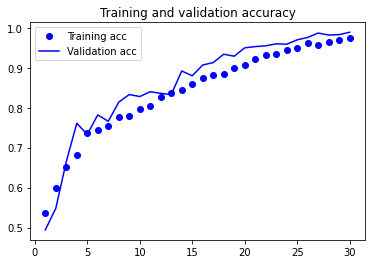

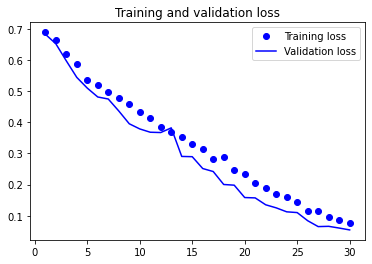

In [34]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()